In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score, plot_roc_curve

pd.options.display.max_columns = 200
pd.options.display.max_rows = 100

In [2]:
import os

os.listdir("../data/processed")

['df_train.csv']

In [3]:
df_train = pd.read_csv("../data/processed/df_train.csv")

df_train

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,Var12,Var13,Var14,Var16,Var17,Var18,Var19,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var33,Var34,Var35,Var36,Var37,Var38,Var40,Var41,Var43,Var44,Var45,Var46,Var47,Var49,Var50,Var51,Var53,Var54,Var56,Var57,Var58,Var59,Var60,Var61,Var62,Var63,Var64,Var65,Var66,Var67,Var68,Var69,Var70,Var71,Var72,Var73,Var74,Var75,Var76,Var77,Var78,Var80,Var81,Var82,Var83,Var84,Var85,Var86,Var87,Var88,Var89,Var90,Var91,Var92,Var93,Var94,Var95,Var96,Var97,Var98,Var99,Var100,Var101,Var102,Var103,Var104,Var105,Var106,Var107,Var108,Var109,Var110,Var111,...,Var125,Var126,Var127,Var128,Var129,Var130,Var131,Var132,Var133,Var134,Var135,Var136,Var137,Var138,Var139,Var140,Var142,Var143,Var144,Var145,Var146,Var147,Var148,Var149,Var150,Var151,Var152,Var153,Var154,Var155,Var156,Var157,Var158,Var159,Var160,Var161,Var162,Var163,Var164,Var165,Var166,Var168,Var170,Var171,Var172,Var173,Var174,Var176,Var177,Var178,Var179,Var180,Var181,Var182,Var183,Var184,Var186,Var187,Var188,Var189,Var190,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,Var201,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var210,Var211,Var212,Var213,Var214,Var215,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,churn
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,NaN,184.0,NaN,NaN,NaN,NaN,NaN,464.0,580.0,NaN,14.0,128.0,NaN,NaN,166.56,NaN,NaN,NaN,NaN,0.0,NaN,NaN,3570.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.076907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,35.0,NaN,1350864.0,NaN,0.0,NaN,7333.11,NaN,5.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.0,NaN,NaN,...,720.0,8.0,NaN,NaN,NaN,NaN,NaN,0.0,1212385.0,69134.0,NaN,NaN,NaN,NaN,NaN,185.0,NaN,0.0,9.0,NaN,NaN,NaN,NaN,397579.0,NaN,NaN,NaN,1812252.0,NaN,NaN,NaN,NaN,NaN,NaN,142.0,NaN,NaN,38418.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,462.0,NaN,NaN,bZkvyxLkBI,RO12,NaN,taul,1K8T,lK27,ka_ns41,nQUveAzAF7,NaN,NaN,dXGu,9_Y1,FbIm,VpdQ,haYg,me75fM6ugJ,kIsH,uKAI,L84s,XfqtO3UdzaXh_,NaN,NaN,NaN,XTbPUYD,sH5Z,cJvF,FzaX,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,0
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,168.0,210.0,NaN,2.0,24.0,NaN,NaN,353.52,NaN,NaN,NaN,NaN,0.0,NaN,NaN,4764966.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.408032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,26,0.0,NaN,2872928.0,NaN,3.0,NaN,151098.90,NaN,25.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4136430.0,357038.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,9.0,NaN,NaN,NaN,NaN,278334.0,NaN,NaN,NaN,10439160.0,NaN,NaN,NaN,NaN,NaN,NaN,32.0,NaN,NaN,238572.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CEat0G8rTN,RO12,NaN,taul,1K8T,2Ix5,qEdASpP,y2LIM01bE1,NaN,NaN,lg1t,9_Y1,k13i,sJzTlal,zm5i,me75fM6ugJ,kIsH,uKAI,L84s,NhsEn4L,NaN,NaN,NaN,kZJyVg2,NaN,NaN,FzaX,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,1
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,NaN,904.0,NaN,NaN,NaN,NaN,NaN,1212.0,1515.0,NaN,26.0,816.0,NaN,NaN,220.08,NaN,NaN,NaN,NaN,0.0,NaN,NaN,5883894.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.599658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130,518.0,NaN,1675776.0,NaN,0.0,NaN,16211.58,NaN,40.0,NaN,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312.0,NaN,NaN,...,5967.0,-28.0,NaN,NaN,NaN,NaN,NaN,0.0,3478905.0,248932.0,NaN,NaN,NaN,NaN,NaN,800.0,NaN,0.0,36.0,NaN,NaN,NaN,NaN,320565.0,NaN,NaN,NaN,9826360.0,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,NaN,434946.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,eOQt0GoOh3,AERks4l,SEuy,taul,1K8T,ffXs,NldASpP,y4g9Xo

In [4]:
"""base rate"""

df_train.churn.mean()

0.07344

## DNN with tensorflow

In [5]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.4.1


# For starters we limit to numeric features as a test

In [6]:
df_train_cont = df_train.select_dtypes(exclude=['object'])

df_train_cont

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,Var12,Var13,Var14,Var16,Var17,Var18,Var19,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var33,Var34,Var35,Var36,Var37,Var38,Var40,Var41,Var43,Var44,Var45,Var46,Var47,Var49,Var50,Var51,Var53,Var54,Var56,Var57,Var58,Var59,Var60,Var61,Var62,Var63,Var64,Var65,Var66,Var67,Var68,Var69,Var70,Var71,Var72,Var73,Var74,Var75,Var76,Var77,Var78,Var80,Var81,Var82,Var83,Var84,Var85,Var86,Var87,Var88,Var89,Var90,Var91,Var92,Var93,Var94,Var95,Var96,Var97,Var98,Var99,Var100,Var101,Var102,Var103,Var104,Var105,Var106,Var107,Var108,Var109,Var110,Var111,Var112,Var113,Var114,Var115,Var116,Var117,Var118,Var119,Var120,Var121,Var122,Var123,Var124,Var125,Var126,Var127,Var128,Var129,Var130,Var131,Var132,Var133,Var134,Var135,Var136,Var137,Var138,Var139,Var140,Var142,Var143,Var144,Var145,Var146,Var147,Var148,Var149,Var150,Var151,Var152,Var153,Var154,Var155,Var156,Var157,Var158,Var159,Var160,Var161,Var162,Var163,Var164,Var165,Var166,Var168,Var170,Var171,Var172,Var173,Var174,Var176,Var177,Var178,Var179,Var180,Var181,Var182,Var183,Var184,Var186,Var187,Var188,Var189,Var190,churn
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,NaN,184.0,NaN,NaN,NaN,NaN,NaN,464.0,580.0,NaN,14.0,128.0,NaN,NaN,166.56,NaN,NaN,NaN,NaN,0.0,NaN,NaN,3570.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.076907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,35.0,NaN,1350864.0,NaN,0.0,NaN,7333.11,NaN,5.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.0,NaN,NaN,168.0,117625.60,NaN,NaN,NaN,NaN,NaN,1175.0,NaN,NaN,NaN,6.0,NaN,720.0,8.0,NaN,NaN,NaN,NaN,NaN,0.0,1212385.0,69134.0,NaN,NaN,NaN,NaN,NaN,185.0,NaN,0.0,9.0,NaN,NaN,NaN,NaN,397579.0,NaN,NaN,NaN,1812252.0,NaN,NaN,NaN,NaN,NaN,NaN,142.0,NaN,NaN,38418.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,462.0,NaN,0
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,168.0,210.0,NaN,2.0,24.0,NaN,NaN,353.52,NaN,NaN,NaN,NaN,0.0,NaN,NaN,4764966.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.408032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,26,0.0,NaN,2872928.0,NaN,3.0,NaN,151098.90,NaN,25.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,40.0,-356411.60,NaN,NaN,NaN,NaN,NaN,590.0,NaN,NaN,NaN,72.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4136430.0,357038.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,9.0,NaN,NaN,NaN,NaN,278334.0,NaN,NaN,NaN,10439160.0,NaN,NaN,NaN,NaN,NaN,NaN,32.0,NaN,NaN,238572.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,NaN,904.0,NaN,NaN,NaN,NaN,NaN,1212.0,1515.0,NaN,26.0,816.0,NaN,NaN,220.08,NaN,NaN,NaN,NaN,0.0,NaN,NaN,5883894.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.599658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130,518.0,NaN,1675776.0,NaN,0.0,NaN,16211.58,NaN,40.0,NaN,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312.0,NaN,NaN,336.0,405104.00,NaN,NaN,NaN,NaN,NaN,3230.0,NaN,NaN,NaN,114.0,NaN,5967.0,-28.0,NaN,NaN,NaN,NaN,NaN,0.0,3478905.0,248932.0,NaN,NaN,NaN,NaN,NaN,800.0,NaN,0.0,36.0,NaN,NaN,NaN,NaN,320565.0,NaN,NaN,NaN,9826360.0,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,NaN,434946.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,22.08,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.988250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-275703.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,-14.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,N

In [7]:
"""
build a simple dnn
"""

inputs = keras.Input(shape=(174,))

In [8]:
inputs

<KerasTensor: shape=(None, 174) dtype=float32 (created by layer 'input_1')>

In [9]:
dense = layers.Dense(174, activation="relu")
x = dense(inputs)
x = layers.Dense(64, activation="relu")(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="dnn_continous")

In [11]:
model.summary()

Model: "dnn_continous"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 174)]             0         
_________________________________________________________________
dense (Dense)                (None, 174)               30450     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                11200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 41,715
Trainable params: 41,715
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=[tf.keras.metrics.AUC()],  # TODO: add AUC, currently creating error on training
)

model.save_weights('model.h5')

In [13]:
split_index = 40000

x_train=df_train_cont.iloc[:split_index,:]
y_train=x_train.churn
x_train=x_train.iloc[:,:-1]
x_train = x_train.fillna(0)

x_test=df_train_cont.iloc[split_index:,:]
y_test=x_test.churn
x_test=x_test.iloc[:,:-1]
x_test = x_test.fillna(0)

In [14]:
x_train

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,Var12,Var13,Var14,Var16,Var17,Var18,Var19,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var33,Var34,Var35,Var36,Var37,Var38,Var40,Var41,Var43,Var44,Var45,Var46,Var47,Var49,Var50,Var51,Var53,Var54,Var56,Var57,Var58,Var59,Var60,Var61,Var62,Var63,Var64,Var65,Var66,Var67,Var68,Var69,Var70,Var71,Var72,Var73,Var74,Var75,Var76,Var77,Var78,Var80,Var81,Var82,Var83,Var84,Var85,Var86,Var87,Var88,Var89,Var90,Var91,Var92,Var93,Var94,Var95,Var96,Var97,Var98,Var99,Var100,Var101,Var102,Var103,Var104,Var105,Var106,Var107,Var108,Var109,Var110,Var111,Var112,Var113,Var114,Var115,Var116,Var117,Var118,Var119,Var120,Var121,Var122,Var123,Var124,Var125,Var126,Var127,Var128,Var129,Var130,Var131,Var132,Var133,Var134,Var135,Var136,Var137,Var138,Var139,Var140,Var142,Var143,Var144,Var145,Var146,Var147,Var148,Var149,Var150,Var151,Var152,Var153,Var154,Var155,Var156,Var157,Var158,Var159,Var160,Var161,Var162,Var163,Var164,Var165,Var166,Var168,Var170,Var171,Var172,Var173,Var174,Var176,Var177,Var178,Var179,Var180,Var181,Var182,Var183,Var184,Var186,Var187,Var188,Var189,Var190
0,0.0,0.0,0.0,0.0,0.0,1526.0,7.0,0.0,0.0,0.0,0.0,184.0,0.0,0.0,0.0,0.0,0.0,464.0,580.0,0.0,14.0,128.0,0.0,0.0,166.56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3570.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.076907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36,35.0,0.0,1350864.0,0.0,0.0,0.0,7333.11,0.0,5.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,104.0,0.0,0.0,168.0,117625.60,0.0,0.0,0.0,0.0,0.0,1175.0,0.0,0.0,0.0,6.0,0.0,720.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1212385.0,69134.0,0.00,0.0,0.0,0.0,0.0,185.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,397579.0,0.0,0.0,0.0,1812252.0,0.0,0.0,0.0,0.0,0.0,0.0,142.0,0.0,0.0,38418.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,462.0,0.0
1,0.0,0.0,0.0,0.0,0.0,525.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,168.0,210.0,0.0,2.0,24.0,0.0,0.0,353.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4764966.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.408032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,26,0.0,0.0,2872928.0,0.0,3.0,0.0,151098.90,0.0,25.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58158.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,40.0,-356411.60,0.0,0.0,0.0,0.0,0.0,590.0,0.0,0.0,0.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,4136430.0,357038.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,278334.0,0.0,0.0,0.0,10439160.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,0.0,0.0,238572.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,5236.0,7.0,0.0,0.0,0.0,0.0,904.0,0.0,0.0,0.0,0.0,0.0,1212.0,1515.0,0.0,26.0,816.0,0.0,0.0,220.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5883894.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.599658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130,518.0,0.0,1675776.0,0.0,0.0,0.0,16211.58,0.0,40.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,312.0,0.0,0.0,336.0,405104.00,0.0,0.0,0.0,0.0,0.0,3230.0,0.0,0.0,0.0,114.0,0.0,5967.0,-28.0,0.0,0.0,0.0,0.0,0.0,0.0,3478905.0,248932.0,0.00,0.0,0.0,0.0,0.0,800.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,320565.0,0.0,0.0,0.0,9826360.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,0.0,434946.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.988250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-275703.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,

In [16]:
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=40,
    validation_split=0.2
)

Epoch 1/40
500/500 [==============================] - 3s 4ms/step - loss: 9086.1665 - auc: 0.5042 - val_loss: 3506.1287 - val_auc: 0.5027
Epoch 2/40
500/500 [==============================] - 1s 3ms/step - loss: 3036.0799 - auc: 0.5055 - val_loss: 3734.6687 - val_auc: 0.5086
Epoch 3/40
500/500 [==============================] - 1s 2ms/step - loss: 2752.6269 - auc: 0.5092 - val_loss: 4149.4717 - val_auc: 0.5017
Epoch 4/40
500/500 [==============================] - 1s 3ms/step - loss: 1941.6239 - auc: 0.5083 - val_loss: 2215.7561 - val_auc: 0.5069
Epoch 5/40
500/500 [==============================] - 1s 3ms/step - loss: 1086.5118 - auc: 0.5123 - val_loss: 2893.2478 - val_auc: 0.5180
Epoch 6/40
500/500 [==============================] - 1s 3ms/step - loss: 1145.0754 - auc: 0.5050 - val_loss: 1252.8574 - val_auc: 0.5100
Epoch 7/40
500/500 [==============================] - 1s 3ms/step - loss: 759.7975 - auc: 0.5181 - val_loss: 808.8632 - val_auc: 0.5067
Epoch 8/40
500/500 [================

In [18]:
def plot_history(history, ):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('model loss')
    ax[0].set_ylabel('loss')
    ax[0].set_xlabel('epoch')
    ax[0].legend(['train', 'val'], loc='upper left')
    ax[0].set_yscale("log")

    ax[1].plot(history.history['auc'])
    ax[1].plot(history.history['val_auc'])
    ax[1].set_title('model auc')
    ax[1].set_ylabel('auc')
    ax[1].set_xlabel('epoch')
    ax[1].legend(['train', 'val'], loc='upper left')

    plt.show()

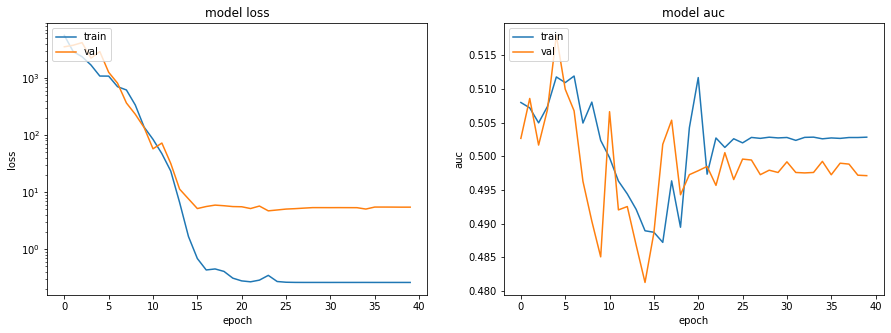

In [19]:
plot_history(history)

In [20]:
from sklearn.metrics import roc_auc_score

In [21]:
"""
As a benchmark: Naive Bayes for only continous features give AUC of ~ 0.57
"""

'\nAs a benchmark: Naive Bayes for only continous features give AUC of ~ 0.57\n'

In [22]:
"""train auc score"""
roc_auc_score(
    y_true=y_train,
    y_score=model.predict(x_train)
)

0.5015108806779125

In [23]:
"test auc score"
roc_auc_score(
    y_true=y_test,
    y_score=model.predict(x_test)
)

0.5000914929368877

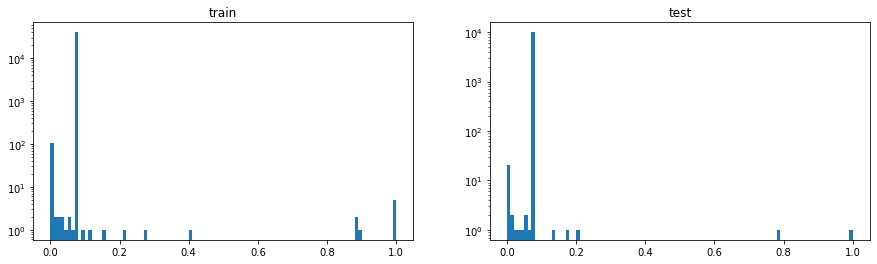

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

ax[0].hist(
    model.predict(x_train), bins=100,
)
ax[0].set_yscale("log")
ax[0].set_title("train")

ax[1].hist(
    model.predict(x_test), bins=100,
)
ax[1].set_yscale("log")
ax[1].set_title("test")

plt.show()

In [25]:
from sklearn.metrics import confusion_matrix

p=0.5

"""
the count of
true negatives isC_{0,0},
false negatives is C_{1,0},
true positives is C_{1,1},
false positives is C_{0,1}
"""

confusion_matrix(
    y_true=y_test,
    y_pred=(model.predict(x_test) >= p)
)

array([[9238,    2],
       [ 760,    0]])

In [26]:
"""
Trying class weights to put more weight to the underrepresented class
"""

total = len(y_train)
pos = y_train.sum()
neg = (total - pos)

print(total, pos, neg)

weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}


40000 2912 37088


In [27]:
weight_for_0, weight_for_1

(0.5392579810181191, 6.868131868131869)

In [29]:
# reset model weights and train with weights
model.load_weights('model.h5')
                   
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=40,
    validation_split=0.2,
    class_weight=class_weight
)

Epoch 1/40
500/500 [==============================] - 2s 4ms/step - loss: 15432.2266 - auc: 0.5084 - val_loss: 3534.4050 - val_auc: 0.5356
Epoch 2/40
500/500 [==============================] - 2s 3ms/step - loss: 2029.0162 - auc: 0.5307 - val_loss: 607.3129 - val_auc: 0.5364
Epoch 3/40
500/500 [==============================] - 2s 3ms/step - loss: 1022.3518 - auc: 0.5259 - val_loss: 379.8084 - val_auc: 0.4990
Epoch 4/40
500/500 [==============================] - 2s 3ms/step - loss: 562.6234 - auc: 0.5171 - val_loss: 282.0430 - val_auc: 0.4980
Epoch 5/40
500/500 [==============================] - 2s 4ms/step - loss: 37.9801 - auc: 0.5074 - val_loss: 35.1350 - val_auc: 0.4867
Epoch 6/40
500/500 [==============================] - 2s 3ms/step - loss: 5.2737 - auc: 0.5002 - val_loss: 4.3069 - val_auc: 0.5135
Epoch 7/40
500/500 [==============================] - 2s 3ms/step - loss: 2.4327 - auc: 0.4983 - val_loss: 2.8925 - val_auc: 0.4980
Epoch 8/40
500/500 [==============================] -

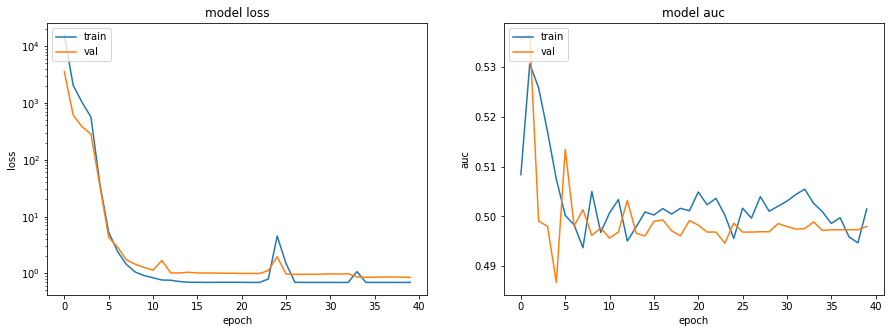

In [30]:
plot_history(history)

In [80]:
"""
Sanity check to test the model

Above results are surprisingly bad. Let's see if there is a bug with the model
"""

x_train.describe()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,Var12,Var13,Var14,Var16,Var17,Var18,Var19,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var33,Var34,Var35,Var36,Var37,Var38,Var40,Var41,Var43,Var44,Var45,Var46,Var47,Var49,Var50,Var51,Var53,Var54,Var56,Var57,Var58,Var59,Var60,Var61,Var62,Var63,Var64,Var65,Var66,Var67,Var68,Var69,Var70,Var71,Var72,Var73,Var74,Var75,Var76,Var77,Var78,Var80,Var81,Var82,Var83,Var84,Var85,Var86,Var87,Var88,Var89,Var90,Var91,Var92,Var93,Var94,Var95,Var96,Var97,Var98,Var99,Var100,Var101,Var102,Var103,Var104,Var105,Var106,Var107,Var108,Var109,Var110,Var111,Var112,Var113,Var114,Var115,Var116,Var117,Var118,Var119,Var120,Var121,Var122,Var123,Var124,Var125,Var126,Var127,Var128,Var129,Var130,Var131,Var132,Var133,Var134,Var135,Var136,Var137,Var138,Var139,Var140,Var142,Var143,Var144,Var145,Var146,Var147,Var148,Var149,Var150,Var151,Var152,Var153,Var154,Var155,Var156,Var157,Var158,Var159,Var160,Var161,Var162,Var163,Var164,Var165,Var166,Var168,Var170,Var171,Var172,Var173,Var174,Var176,Var177,Var178,Var179,Var180,Var181,Var182,Var183,Var184,Var186,Var187,Var188,Var189,Var190
count,40000.000000,40000.0,40000.000000,40000.000000,4.000000e+04,40000.000000,40000.000000,40000.000000,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,40000.00000,40000.000000,4.000000e+04,4.000000e+04,4.000000e+04,40000.00000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,40000.00000,4.000000e+04,40000.000000,4.000000e+04,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,40000.000000,40000.000000,4.000000e+04,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000,4.000000e+04,40000.00000,4.000000e+04,4.000000e+04,40000.000000,40000.000000,4.000000e+04,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000,40000.00000,4.000000e+04,40000.000000,4.000000e+04,40000.000000,40000.000000,4.000000e+04,40000.000000,4.000000e+04,4.000000e+04,40000.000000,40000.000000,4.000000e+04,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000,4.000000e+04,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,40000.000000,4.000000e+04,4.000000e+04,40000.000000,4.000000e+04,40000.000000,40000.0,4.000000e+04,40000.000000,40000.0000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,4.000000e+04,40000.000000,40000.000000,4.000000e+04,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,4.000000e+04,40000.000000,4.000000e+04,40000.000000,40000.000000,40000.000000,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,40000.000000,40000.000000,4.000000e+04,40000.000000,4.000000e+04,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,0.169600,0.0,10.542000,0.004050,7.138245e+03,1181.365150,6.072675,0.696250,1.187299e+04,0.211400,0.187800,1109.492800,0.018550,3.531357,0.366625,0.242550,0.008550,209.404200,262.012250,0.234375,3.894600,87.413000,0.002250,0.000650,201.994095,0.000200,0.105500,2.210185e+03,0.02480,0.646125,3.808768e+03,1.957874e+04,2.316508e+06,0.34940,0.374325,0.09750,0.146700,51.322076,0.412800,0.030200,0.002250,0.474500,3247.154404,9.265866e+03,0.11820,1.112060e+03,3.510692,1.881722e+03,6.343335e+03,0.305025,0.731000,0.060075,0.57270,127.565645,13.217400,1.382900,0.000375,2.052925,1.042418e+05,1.163800e+04,3.174450,2.312175,66.521950,

In [48]:
x_train.shape

(40000, 174)

In [87]:
y_train_dummy = (x_train["Var6"] >= 2500).apply(lambda x: int(x))
y_test_dummy = (x_test["Var6"] >= 2500).apply(lambda x: int(x))

n_dummy_cols = 174

""" the model
inputs = keras.Input(shape=(174,))
dense = layers.Dense(174, activation="relu")
x = dense(inputs)
x = layers.Dense(64, activation="relu")(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="dnn_continous")
"""

inputs = keras.Input(shape=(n_dummy_cols,))
dense = layers.Dense(174, activation="relu")
z = dense(inputs)
z = layers.Dense(64, activation="relu")(z)
outputs = layers.Dense(1, activation="sigmoid")(z)

model_z = keras.Model(inputs=inputs, outputs=outputs, name="dnn_continous")

model_z.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=[tf.keras.metrics.AUC()],  # TODO: add AUC, currently creating error on training
)

del history

history = model_z.fit(
    x_train.iloc[:,:n_dummy_cols],
    y_train_dummy,
    batch_size=64,
    epochs=50,
    validation_split=0.2,
    class_weight=class_weight
)

Epoch 1/50
500/500 [==============================] - 2s 3ms/step - loss: 27456.4476 - auc_18: 0.6417 - val_loss: 1000.1340 - val_auc_18: 0.7394
Epoch 2/50
500/500 [==============================] - 1s 3ms/step - loss: 3419.9315 - auc_18: 0.7974 - val_loss: 1830.6050 - val_auc_18: 0.8552
Epoch 3/50
500/500 [==============================] - 1s 3ms/step - loss: 1852.4814 - auc_18: 0.8330 - val_loss: 890.0121 - val_auc_18: 0.8021
Epoch 4/50
500/500 [==============================] - 1s 3ms/step - loss: 1903.6684 - auc_18: 0.8280 - val_loss: 4214.0620 - val_auc_18: 0.8278
Epoch 5/50
500/500 [==============================] - 2s 3ms/step - loss: 1503.8060 - auc_18: 0.8344 - val_loss: 6640.2573 - val_auc_18: 0.7909
Epoch 6/50
500/500 [==============================] - 1s 3ms/step - loss: 1477.6086 - auc_18: 0.8473 - val_loss: 975.8054 - val_auc_18: 0.8724
Epoch 7/50
500/500 [==============================] - 1s 3ms/step - loss: 913.2976 - auc_18: 0.8557 - val_loss: 650.2943 - val_auc_18: 0.

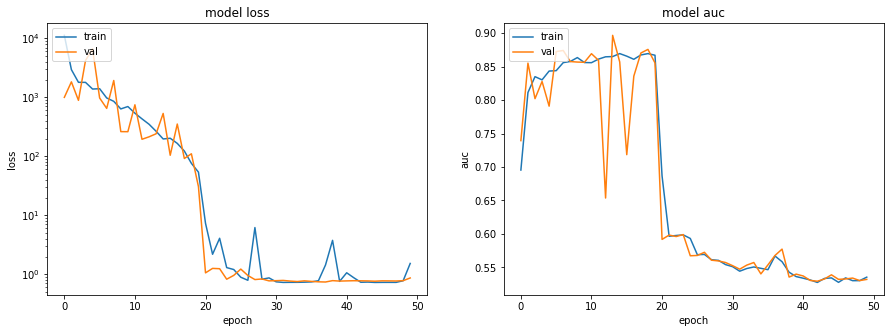

In [88]:
auc = list(history.history.keys())[1]
auc_val = list(history.history.keys())[3]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set_title('model loss')
ax[0].set_ylabel('loss')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'val'], loc='upper left')
ax[0].set_yscale("log")

ax[1].plot(history.history[auc])
ax[1].plot(history.history[auc_val])
ax[1].set_title('model auc')
ax[1].set_ylabel('auc')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'val'], loc='upper left')

plt.show()

In [2]:
"""
Looks like the model finds a strategy to decrease cross entropy which
also results in a lower AUC. This feels hard to solve easily. I'll stop for now.
"""

"\nLooks like the model finds a strategy to decrease cross entropy which\nalso results in a lower AUC. This feels hard to solve easily. I'll stop for now.\n"